In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import re


In [151]:
df = pd.read_csv('/home/yadhu/dataset/house_price.csv')

In [85]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [87]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [88]:
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


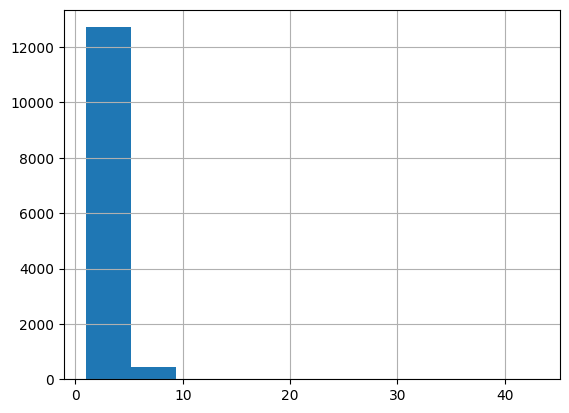

In [136]:
df["bhk"].hist()
plt.show()

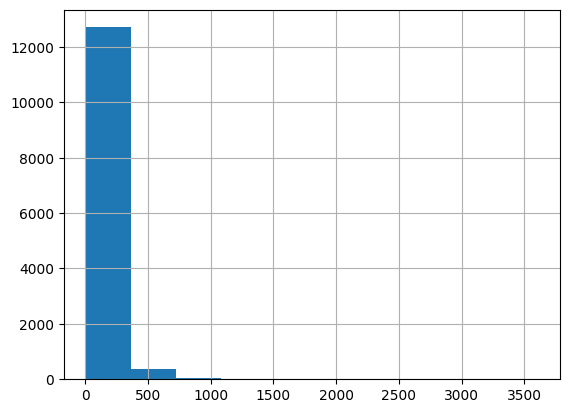

In [90]:
df["price"].hist()
plt.show()

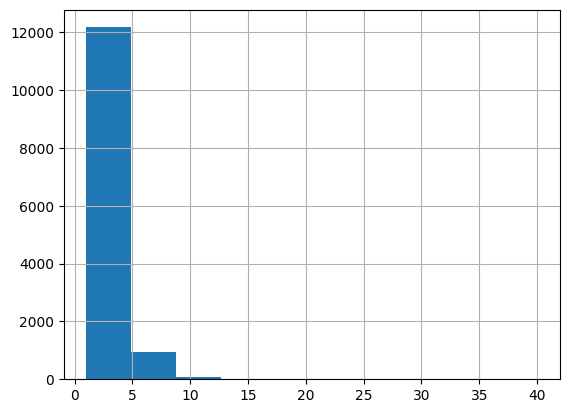

In [98]:
df["bath"].hist()
plt.show()

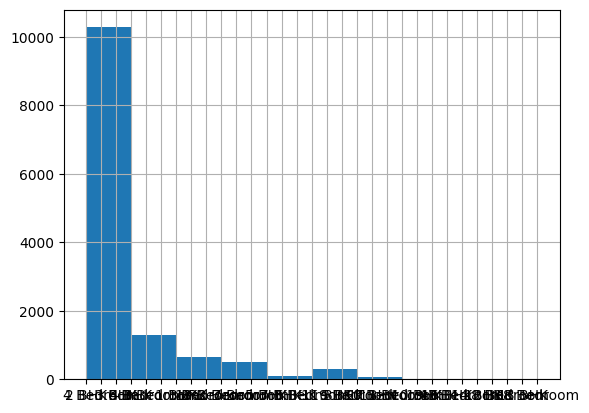

In [137]:
df["size"].hist()
plt.show()

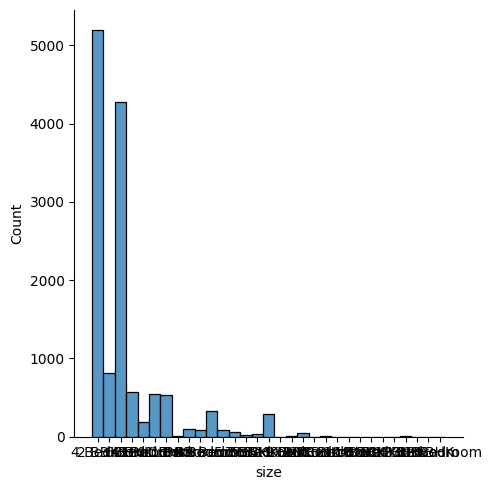

In [138]:
sns.displot(df["size"])

<Axes: ylabel='size'>

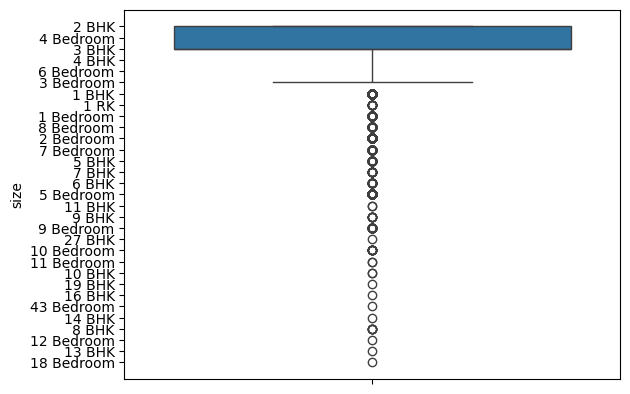

In [139]:
# right skewed 
# to get outliers very clearly
sns.boxplot(df["size"])

In [140]:
def replace_text_after_number(text, replacement):
    return re.sub(r'(\d+)\s.*', r'\1 ' + replacement, text)

# Apply the function to the column
df['size'] = df["size"].apply(lambda x: replace_text_after_number(x, 'room'))

In [141]:
print(df)

                       location    size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II  2 room      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 room      2600.0   5.0  120.00    4   
2                   Uttarahalli  3 room      1440.0   2.0   62.00    3   
3            Lingadheeranahalli  3 room      1521.0   3.0   95.00    3   
4                      Kothanur  2 room      1200.0   2.0   51.00    2   
...                         ...     ...         ...   ...     ...  ...   
13195                Whitefield  5 room      3453.0   4.0  231.00    5   
13196                     other  4 room      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar  2 room      1141.0   2.0   60.00    2   
13198           Padmanabhanagar  4 room      4689.0   4.0  488.00    4   
13199              Doddathoguru  1 room       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2                4305  
3              

<Axes: ylabel='size'>

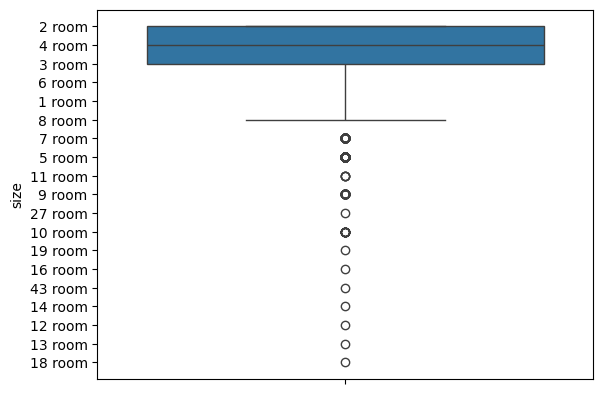

In [142]:
sns.boxplot(df["size"])

<Axes: ylabel='price'>

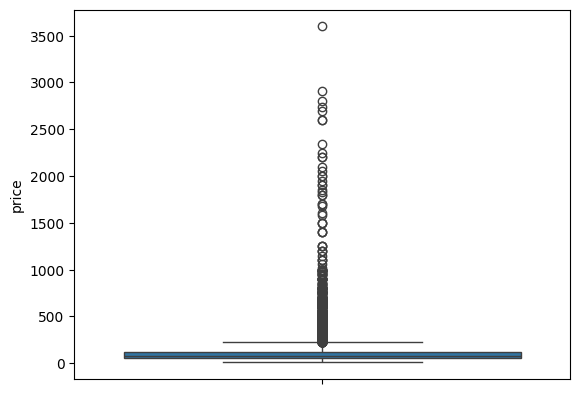

In [143]:
# right skewed 
# to get outliers very clearly
sns.boxplot(df["price"])

In [144]:
#using IQR to find Outliers 
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)

In [145]:
print(q1, q3)
IQR = q3 - q1
lower_bond = q1 - 1.5 * IQR 
upper_bond = q3 + 1.5 * IQR
print(lower_bond, 'lower_bond')
print(upper_bond, 'upper_bond')

50.0 120.0
-55.0 lower_bond
225.0 upper_bond


In [146]:
IQR_outliers = df[(df['price'] < lower_bond) | (df['price'] > upper_bond)]
print(IQR_outliers)

               location    size  total_sqft  bath  price  bhk  price_per_sqft
7          Rajaji Nagar  4 room      3300.0   4.0  600.0    4           18181
9                 other  6 room      1020.0   6.0  370.0    6           36274
11           Whitefield  4 room      2785.0   5.0  295.0    4           10592
18                other  3 room      2770.0   4.0  290.0    3           10469
22          Thanisandra  4 room      2800.0   5.0  380.0    4           13571
...                 ...     ...         ...   ...    ...  ...             ...
13186             other  4 room      1200.0   5.0  325.0    4           27083
13191  Ramamurthy Nagar  7 room      1500.0   9.0  250.0    7           16666
13195        Whitefield  5 room      3453.0   4.0  231.0    5            6689
13196             other  4 room      3600.0   5.0  400.0    4           11111
13198   Padmanabhanagar  4 room      4689.0   4.0  488.0    4           10407

[1250 rows x 7 columns]


In [147]:
# z_score mothod 
mean = df['price'].mean()
std_dev = df['price'].std()
df['z_score'] = (df['price'] - mean) / std_dev
threshold = 3
z_outliers = df[np.abs(df['z_score']) > threshold]
print(z_outliers.count())

location          192
size              192
total_sqft        192
bath              192
price             192
bhk               192
price_per_sqft    192
z_score           192
dtype: int64


In [152]:
# Using capping method to replace outliers in the range of upper viscor and lower viscor
df['price'] = df['price'].clip(lower=lower_bond, upper=upper_bond)
print(df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  225.00    5   
13196                     other      4 BHK      3600.0   5.0  225.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  225.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

<Axes: ylabel='price'>

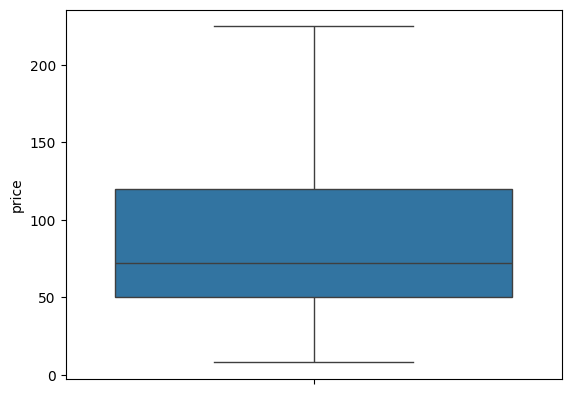

In [153]:
sns.boxplot(df["price"])